In [1]:
try:
    import tensorflow.compat.v1 as tf
    tf.disable_v2_behavior()
    print('v1 behaviour!')
except ImportError:
    import tensorflow as tf
    print('Entered in the exception')

from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from numpy import where
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term
v1 behaviour!


In [2]:
seed = 42

In [3]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# Method to plot the Perceptron's decision boundary.
def plot_decision_boundary(classifier, X, y, title):    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    XX_ = np.c_[xx.ravel(), yy.ravel()]
        
    Z = classifier.predict(XX_)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(5, 5))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$x_2$', fontsize=14)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title(title)
    plt.grid()

    plt.show()

In [4]:
N = 1000

# generate 2d classification dataset
X, y = make_blobs(n_samples=N, centers=2, n_features=2, random_state=seed)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

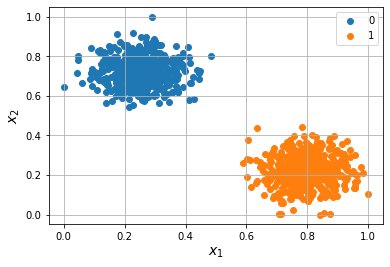

In [5]:
# select indices of points with each class label
for i in range(2):
    samples_ix = where(y == i)
    pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
pyplot.legend()
pyplot.xlabel('$x_1$', fontsize=14)
pyplot.ylabel('$x_2$', fontsize=14)
pyplot.grid()
pyplot.show()

### Função de ativação sigmóide

In [6]:
reset_graph()

# define model
init = tf.compat.v1.keras.initializers.RandomNormal(mean=0, stddev=1)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(2, input_dim=2, activation='sigmoid', kernel_initializer=init, name='denseIn'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid', kernel_initializer=init, name='denseHidden1'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid', kernel_initializer=init, name='denseHidden2'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid', kernel_initializer=init, name='denseHidden3'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid', kernel_initializer=init, name='denseHidden4'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid', kernel_initializer=init, name='denseHidden5'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid', kernel_initializer=init, name='denseHidden6'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid', kernel_initializer=init, name='denseHidden7'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid', kernel_initializer=init, name='denseHidden8'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid', kernel_initializer=init, name='denseHidden9'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid', kernel_initializer=init, name='denseHidden10'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer=init, name='denseOut'))

# compile model
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# prepare callback
tb = tf.keras.callbacks.TensorBoard(histogram_freq=1, write_grads=True, log_dir='./logs_sigmoid')

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, callbacks=[tb])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 500 samples, validate on 500 samples
Epoch 1/500


C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


500/500 [==============================] - 2s 3ms/sample - loss: 0.7103 - acc: 0.4820 - val_loss: 0.6948 - val_acc: 0.5180
Epoch 2/500
500/500 [==============================] - 0s 834us/sample - loss: 0.6990 - acc: 0.4820 - val_loss: 0.6929 - val_acc: 0.5180
Epoch 3/500
500/500 [==============================] - 0s 866us/sample - loss: 0.6929 - acc: 0.5220 - val_loss: 0.6940 - val_acc: 0.4820
Epoch 4/500
500/500 [==============================] - 0s 858us/sample - loss: 0.6929 - acc: 0.5180 - val_loss: 0.6956 - val_acc: 0.4820
Epoch 5/500
500/500 [==============================] - 0s 854us/sample - loss: 0.6927 - acc: 0.5180 - val_loss: 0.6953 - val_acc: 0.4820
Epoch 6/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.6927 - acc: 0.5180 - val_loss: 0.6950 - val_acc: 0.4820
Epoch 7/500
500/500 [==============================] - 0s 830us/sample - loss: 0.6926 - acc: 0.5180 - val_loss: 0.6946 - val_acc: 0.4820
Epoch 8/500
500/500 [==============================] - 0s

500/500 [==============================] - 0s 806us/sample - loss: 0.6926 - acc: 0.5180 - val_loss: 0.6954 - val_acc: 0.4820
Epoch 120/500
500/500 [==============================] - 0s 840us/sample - loss: 0.6927 - acc: 0.5180 - val_loss: 0.6954 - val_acc: 0.4820
Epoch 121/500
500/500 [==============================] - 0s 782us/sample - loss: 0.6927 - acc: 0.5180 - val_loss: 0.6953 - val_acc: 0.4820
Epoch 122/500
500/500 [==============================] - 0s 784us/sample - loss: 0.6926 - acc: 0.5180 - val_loss: 0.6953 - val_acc: 0.4820
Epoch 123/500
500/500 [==============================] - 0s 778us/sample - loss: 0.6929 - acc: 0.5180 - val_loss: 0.6947 - val_acc: 0.4820
Epoch 124/500
500/500 [==============================] - 0s 774us/sample - loss: 0.6930 - acc: 0.5180 - val_loss: 0.6958 - val_acc: 0.4820
Epoch 125/500
500/500 [==============================] - 0s 784us/sample - loss: 0.6933 - acc: 0.5180 - val_loss: 0.6945 - val_acc: 0.4820
Epoch 126/500
500/500 [==================

500/500 [==============================] - 0s 810us/sample - loss: 0.6927 - acc: 0.5180 - val_loss: 0.6956 - val_acc: 0.4820
Epoch 238/500
500/500 [==============================] - 0s 786us/sample - loss: 0.6926 - acc: 0.5180 - val_loss: 0.6955 - val_acc: 0.4820
Epoch 239/500
500/500 [==============================] - 0s 878us/sample - loss: 0.6926 - acc: 0.5180 - val_loss: 0.6952 - val_acc: 0.4820
Epoch 240/500
500/500 [==============================] - 0s 832us/sample - loss: 0.6927 - acc: 0.5180 - val_loss: 0.6945 - val_acc: 0.4820
Epoch 241/500
500/500 [==============================] - 0s 836us/sample - loss: 0.6926 - acc: 0.5180 - val_loss: 0.6952 - val_acc: 0.4820
Epoch 242/500
500/500 [==============================] - 0s 842us/sample - loss: 0.6928 - acc: 0.5180 - val_loss: 0.6959 - val_acc: 0.4820
Epoch 243/500
500/500 [==============================] - 1s 1ms/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6948 - val_acc: 0.4820
Epoch 244/500
500/500 [====================

500/500 [==============================] - 1s 1ms/sample - loss: 0.6928 - acc: 0.5180 - val_loss: 0.6945 - val_acc: 0.4820
Epoch 356/500
500/500 [==============================] - 0s 766us/sample - loss: 0.6930 - acc: 0.5180 - val_loss: 0.6961 - val_acc: 0.4820
Epoch 357/500
500/500 [==============================] - 0s 770us/sample - loss: 0.6928 - acc: 0.5180 - val_loss: 0.6954 - val_acc: 0.4820
Epoch 358/500
500/500 [==============================] - 0s 770us/sample - loss: 0.6927 - acc: 0.5180 - val_loss: 0.6961 - val_acc: 0.4820
Epoch 359/500
500/500 [==============================] - 0s 792us/sample - loss: 0.6945 - acc: 0.5180 - val_loss: 0.6941 - val_acc: 0.4820
Epoch 360/500
500/500 [==============================] - 0s 758us/sample - loss: 0.6934 - acc: 0.5180 - val_loss: 0.6963 - val_acc: 0.4820
Epoch 361/500
500/500 [==============================] - 0s 804us/sample - loss: 0.6928 - acc: 0.5180 - val_loss: 0.6950 - val_acc: 0.4820
Epoch 362/500
500/500 [====================

500/500 [==============================] - 0s 806us/sample - loss: 0.6927 - acc: 0.5180 - val_loss: 0.6948 - val_acc: 0.4820
Epoch 415/500
500/500 [==============================] - 0s 784us/sample - loss: 0.6928 - acc: 0.5180 - val_loss: 0.6955 - val_acc: 0.4820
Epoch 416/500
500/500 [==============================] - 0s 794us/sample - loss: 0.6926 - acc: 0.5180 - val_loss: 0.6945 - val_acc: 0.4820
Epoch 417/500
500/500 [==============================] - 0s 794us/sample - loss: 0.6926 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 418/500
500/500 [==============================] - 0s 788us/sample - loss: 0.6928 - acc: 0.5180 - val_loss: 0.6948 - val_acc: 0.4820
Epoch 419/500
500/500 [==============================] - 0s 800us/sample - loss: 0.6928 - acc: 0.5180 - val_loss: 0.6948 - val_acc: 0.4820
Epoch 420/500
500/500 [==============================] - 0s 798us/sample - loss: 0.6926 - acc: 0.5180 - val_loss: 0.6954 - val_acc: 0.4820
Epoch 421/500
500/500 [==================

500/500 [==============================] - 0s 772us/sample - loss: 0.6926 - acc: 0.5180 - val_loss: 0.6950 - val_acc: 0.4820
Epoch 474/500
500/500 [==============================] - 0s 808us/sample - loss: 0.6928 - acc: 0.5180 - val_loss: 0.6964 - val_acc: 0.4820
Epoch 475/500
500/500 [==============================] - 0s 838us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6953 - val_acc: 0.4820
Epoch 476/500
500/500 [==============================] - 0s 790us/sample - loss: 0.6929 - acc: 0.5180 - val_loss: 0.6943 - val_acc: 0.4820
Epoch 477/500
500/500 [==============================] - 0s 832us/sample - loss: 0.6929 - acc: 0.5180 - val_loss: 0.6953 - val_acc: 0.4820
Epoch 478/500
500/500 [==============================] - 0s 904us/sample - loss: 0.6927 - acc: 0.5180 - val_loss: 0.6950 - val_acc: 0.4820
Epoch 479/500
500/500 [==============================] - 0s 908us/sample - loss: 0.6929 - acc: 0.5180 - val_loss: 0.6944 - val_acc: 0.4820
Epoch 480/500
500/500 [==================

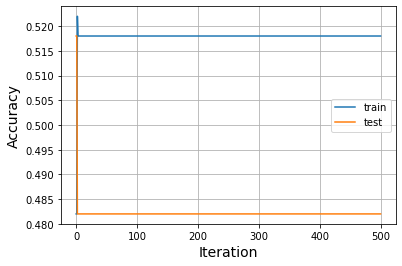

In [7]:
# plot training history
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.xlabel('Iteration', fontsize=14)
pyplot.ylabel('Accuracy', fontsize=14)
pyplot.legend()
pyplot.grid()
pyplot.show()

C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\keras\engine\training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


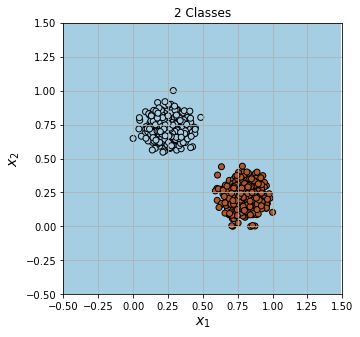

In [8]:
plot_decision_boundary(model, X, y, '2 Classes')

#### IMPORTANTE: As vezes é necessário se executar estas duas linhas.

taskkill /im tensorboard.exe /f

del /q %TMP%\.tensorboard-info\*

C:\Users\felipe.figueiredo\AppData\Local\Temp

In [9]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
#%reload_ext tensorboard

In [10]:
%tensorboard --logdir './logs_sigmoid'

Reusing TensorBoard on port 6006 (pid 19936), started 4:08:44 ago. (Use '!kill 19936' to kill it.)

### Runção de ativação ReLU

In [6]:
reset_graph()

# define model
init = tf.compat.v1.keras.initializers.RandomNormal(mean=0, stddev=1)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(2, input_dim=2, activation='relu', kernel_initializer=init, name='denseIn'))
model.add(tf.keras.layers.Dense(2, activation='relu', kernel_initializer=init, name='denseHidden1'))
model.add(tf.keras.layers.Dense(2, activation='relu', kernel_initializer=init, name='denseHidden2'))
model.add(tf.keras.layers.Dense(2, activation='relu', kernel_initializer=init, name='denseHidden3'))
model.add(tf.keras.layers.Dense(2, activation='relu', kernel_initializer=init, name='denseHidden4'))
model.add(tf.keras.layers.Dense(2, activation='relu', kernel_initializer=init, name='denseHidden5'))
model.add(tf.keras.layers.Dense(2, activation='relu', kernel_initializer=init, name='denseHidden6'))
model.add(tf.keras.layers.Dense(2, activation='relu', kernel_initializer=init, name='denseHidden7'))
model.add(tf.keras.layers.Dense(2, activation='relu', kernel_initializer=init, name='denseHidden8'))
model.add(tf.keras.layers.Dense(2, activation='relu', kernel_initializer=init, name='denseHidden9'))
model.add(tf.keras.layers.Dense(2, activation='relu', kernel_initializer=init, name='denseHidden10'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer=init, name='denseOut'))

# compile model
opt = tf.keras.optimizers.Adam()
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# prepare callback
tb = tf.keras.callbacks.TensorBoard(histogram_freq=1, write_grads=True, log_dir='./logs_relu')

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, batch_size=128, callbacks=[tb])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 500 samples, validate on 500 samples
Epoch 1/500


C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


500/500 [==============================] - 3s 6ms/sample - loss: 0.6931 - acc: 0.5180 - val_loss: 0.6932 - val_acc: 0.4820
Epoch 2/500
500/500 [==============================] - 0s 328us/sample - loss: 0.6931 - acc: 0.5180 - val_loss: 0.6932 - val_acc: 0.4820
Epoch 3/500
500/500 [==============================] - 0s 364us/sample - loss: 0.6930 - acc: 0.5180 - val_loss: 0.6933 - val_acc: 0.4820
Epoch 4/500
500/500 [==============================] - 0s 282us/sample - loss: 0.6930 - acc: 0.5180 - val_loss: 0.6933 - val_acc: 0.4820
Epoch 5/500
500/500 [==============================] - 0s 276us/sample - loss: 0.6930 - acc: 0.5180 - val_loss: 0.6933 - val_acc: 0.4820
Epoch 6/500
500/500 [==============================] - 0s 380us/sample - loss: 0.6930 - acc: 0.5180 - val_loss: 0.6933 - val_acc: 0.4820
Epoch 7/500
500/500 [==============================] - 0s 346us/sample - loss: 0.6930 - acc: 0.5180 - val_loss: 0.6934 - val_acc: 0.4820
Epoch 8/500
500/500 [==============================] - 

500/500 [==============================] - 0s 256us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6946 - val_acc: 0.4820
Epoch 61/500
500/500 [==============================] - 0s 286us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6946 - val_acc: 0.4820
Epoch 62/500
500/500 [==============================] - 0s 280us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6946 - val_acc: 0.4820
Epoch 63/500
500/500 [==============================] - 0s 292us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6947 - val_acc: 0.4820
Epoch 64/500
500/500 [==============================] - 0s 300us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6947 - val_acc: 0.4820
Epoch 65/500
500/500 [==============================] - 0s 334us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6947 - val_acc: 0.4820
Epoch 66/500
500/500 [==============================] - 0s 302us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6947 - val_acc: 0.4820
Epoch 67/500
500/500 [=========================

500/500 [==============================] - 0s 266us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6950 - val_acc: 0.4820
Epoch 120/500
500/500 [==============================] - 0s 300us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6950 - val_acc: 0.4820
Epoch 121/500
500/500 [==============================] - 0s 264us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6950 - val_acc: 0.4820
Epoch 122/500
500/500 [==============================] - 0s 268us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6950 - val_acc: 0.4820
Epoch 123/500
500/500 [==============================] - 0s 270us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6950 - val_acc: 0.4820
Epoch 124/500
500/500 [==============================] - 0s 256us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6950 - val_acc: 0.4820
Epoch 125/500
500/500 [==============================] - 0s 274us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6950 - val_acc: 0.4820
Epoch 126/500
500/500 [==================

500/500 [==============================] - 0s 324us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 179/500
500/500 [==============================] - 0s 272us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 180/500
500/500 [==============================] - 0s 262us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 181/500
500/500 [==============================] - 0s 266us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 182/500
500/500 [==============================] - 0s 258us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 183/500
500/500 [==============================] - 0s 278us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 184/500
500/500 [==============================] - 0s 262us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 185/500
500/500 [==================

500/500 [==============================] - 0s 310us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 238/500
500/500 [==============================] - 0s 274us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 239/500
500/500 [==============================] - 0s 264us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 240/500
500/500 [==============================] - 0s 302us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 241/500
500/500 [==============================] - 0s 292us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 242/500
500/500 [==============================] - 0s 292us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 243/500
500/500 [==============================] - 0s 306us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 244/500
500/500 [==================

500/500 [==============================] - 0s 254us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 297/500
500/500 [==============================] - 0s 252us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 298/500
500/500 [==============================] - 0s 598us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 299/500
500/500 [==============================] - 0s 252us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 300/500
500/500 [==============================] - 0s 254us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 301/500
500/500 [==============================] - 0s 252us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 302/500
500/500 [==============================] - 0s 290us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 303/500
500/500 [==================

500/500 [==============================] - 0s 254us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 356/500
500/500 [==============================] - 0s 290us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 357/500
500/500 [==============================] - 0s 304us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 358/500
500/500 [==============================] - 0s 280us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 359/500
500/500 [==============================] - 0s 262us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 360/500
500/500 [==============================] - 0s 264us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 361/500
500/500 [==============================] - 0s 266us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 362/500
500/500 [==================

500/500 [==============================] - 0s 264us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 415/500
500/500 [==============================] - 0s 256us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 416/500
500/500 [==============================] - 0s 256us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 417/500
500/500 [==============================] - 0s 256us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 418/500
500/500 [==============================] - 0s 272us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 419/500
500/500 [==============================] - 0s 252us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 420/500
500/500 [==============================] - 0s 248us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 421/500
500/500 [==================

500/500 [==============================] - 0s 270us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 474/500
500/500 [==============================] - 0s 298us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 475/500
500/500 [==============================] - 0s 282us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 476/500
500/500 [==============================] - 0s 360us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 477/500
500/500 [==============================] - 0s 296us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 478/500
500/500 [==============================] - 0s 320us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 479/500
500/500 [==============================] - 0s 286us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 480/500
500/500 [==================

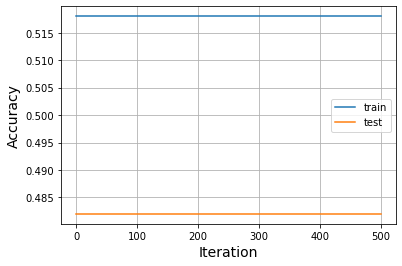

In [7]:
# plot training history
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.xlabel('Iteration', fontsize=14)
pyplot.ylabel('Accuracy', fontsize=14)
pyplot.legend()
pyplot.grid()
pyplot.show()

C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\keras\engine\training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


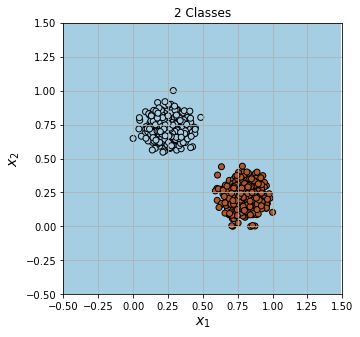

In [8]:
plot_decision_boundary(model, X, y, '2 Classes')

In [9]:
# Load the TensorBoard notebook extension
#%load_ext tensorboard
%reload_ext tensorboard

In [15]:
%tensorboard --logdir './logs_relu'

### Referências

[1] https://machinelearningmastery.com/how-to-fix-vanishing-gradients-using-the-rectified-linear-activation-function/

[2] https://medium.com/analytics-vidhya/debugging-dnn-with-help-of-tensorboard-f737b7bc5ed9

[3] https://ayearofai.com/rohan-4-the-vanishing-gradient-problem-ec68f76ffb9b#.bojpejg3o